In [1]:
import pandas as pd
import numpy as np
import pycaret.regression as pycReg

In [20]:
df = pd.read_csv('data/preprocessed.csv')

In [21]:
column_name = list(data.columns)
data.shape

(117, 39)

In [26]:
#setup model
model = pycReg.setup(data = df, 
                    target = 'target',
                    train_size=0.7,
                    normalize=True,
                    verbose=False,
                    numeric_features=list(df.drop(['target'], axis=1).columns),
                    silent = True)

In [28]:
# #compare models
# pycReg.compare_models(sort = "RMSE")

In [29]:
#create model
catB = pycReg.create_model('catboost', verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5836,0.747,0.8643,0.5198,-0,0.2264
1,0.7347,0.9769,0.9884,0.4958,-0,0.392
2,0.9286,1.182,1.087,0.2654,-0,0.5291
3,0.5905,0.4333,0.6583,0.7307,-0,0.4234
4,0.8392,0.9555,0.9775,0.454,-0,0.3397
5,0.5979,0.5902,0.7682,0.5894,-0,0.2078
6,0.3923,0.1791,0.4232,0.8386,-0,0.2924
7,0.4593,0.2866,0.5353,0.3449,-0,0.3069
8,0.663,0.5229,0.7231,0.5817,-0,0.2915
9,0.708,0.7778,0.8819,-0.037,-0,0.2508


In [30]:
#tune model
catB = pycReg.tune_model(catB, optimize = "RMSE", n_iter = 500)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6092,0.7782,0.8822,0.4997,-0,0.2225
1,0.5879,0.9022,0.9499,0.5343,-0,0.3182
2,0.8397,0.9176,0.9579,0.4299,-0,0.5164
3,0.4056,0.2354,0.4852,0.8537,-0,0.272
4,0.6993,0.6825,0.8261,0.61,-0,0.3929
5,0.4707,0.461,0.6789,0.6793,-0,0.1679
6,0.3187,0.1502,0.3876,0.8646,-0,0.2186
7,0.4448,0.3127,0.5592,0.2852,-0,0.3101
8,0.5214,0.3974,0.6304,0.6821,-0,0.2214
9,0.6065,0.4869,0.6978,0.3508,-0,0.2221


In [31]:
import shap
explainer = shap.TreeExplainer(catB)
shap_values = explainer.shap_values(df.drop(['target'], axis=1).values)

In [32]:
shap_values.shape

(117, 38)

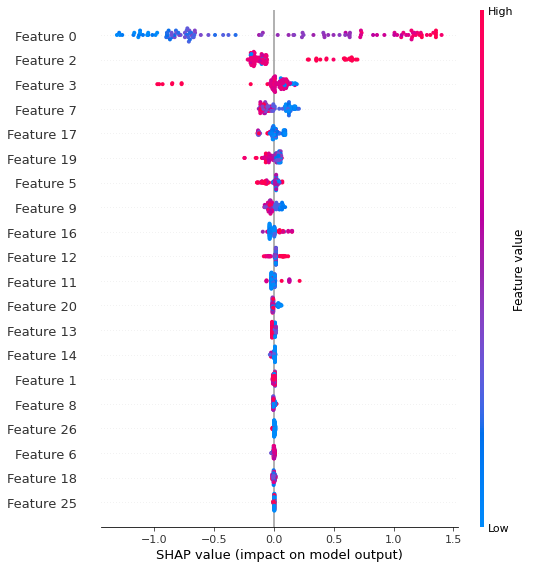

In [36]:
shap.summary_plot(shap_values, df.drop(['target'], axis=1).values)

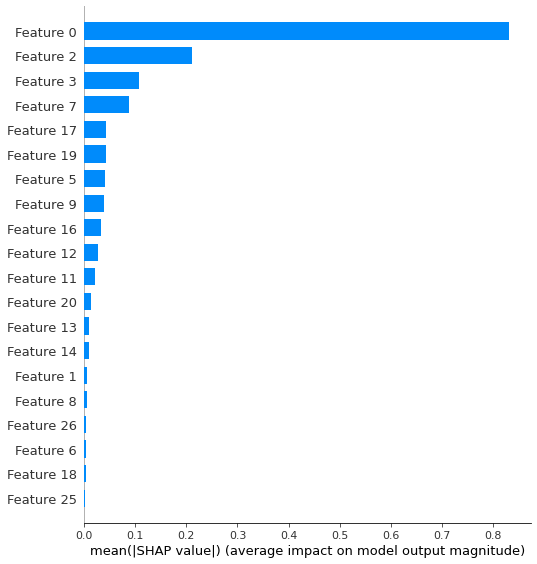

In [34]:
shap.summary_plot(shap_values, df.drop(['target'], axis=1).values, plot_type='bar')